---
layout: post
title:  AI Agent testing with LangGraph
date:   2025-09-06
categories: [AI, LangChain, LangGraph]
typora-root-url: /Users/ojitha/GitHub/ojitha.github.io
typora-copy-images-to: ../assets/images/${filename}
---

<style>
/* Styles for the two-column layout */
.image-text-container {
    display: flex; /* Enables flexbox */
    flex-wrap: wrap; /* Allows columns to stack on small screens */
    gap: 10px; /* Space between the image and text */
    align-items: left; /* Vertically centers content in columns */
    margin-bottom: 20px; /* Space below this section */
}

.image-column {
    flex: 1; /* Allows this column to grow */
    min-width: 150px; /* Minimum width for the image column before stacking */
    max-width: 20%; /* Maximum width for the image column to not take up too much space initially */
    box-sizing: border-box; /* Include padding/border in element's total width/height */
}

.text-column {
    flex: 2; /* Allows this column to grow more (e.g., twice as much as image-column) */
    min-width: 300px; /* Minimum width for the text column before stacking */
    box-sizing: border-box;
}

</style>

<div class="image-text-container">
    <div class="image-column">
        <img src="/assets/images/2025-09-05-LangGrapStudioExample/langgraph_testing_sketch.svg" alt="LangGraph Testing Sketch" width="150" height="150">
    </div>
    <div class="text-column">
<p>
 The comprehensive testing framework demonstrates local validation strategies using detailed conversation history analysis, where each message type, tool call, and state transition is meticulously tracked and displayed for debugging purposes. The implementation showcases systematic test coverage across multiple agent capabilities including weather retrieval, mathematical calculations, web search, and state management, ensuring robust validation of tool selection logic and parameter handling. This testing methodology ensures that AI agents maintain transparency, reliability, and predictable behavior while scaling from development prototypes to production-ready systems with confidence in their decision-making processes.
</p>
    </div>
</div>

<!--more-->

📝 source: [Jupyter Notebook](https://github.com/ojitha/learn-langgraph/blob/main/aiagents/2025-09-05-LangGrapStudioExample.ipynb){:target="_blank"}

------

* TOC
{:toc}
------

## Introduction

The architecture demonstrated in this guide showcases how modern AI agents can be constructed using a graph-based approach that mirrors human cognitive processes. 

> Rather than relying on simple prompt-response patterns, this system implements a sophisticated workflow where the agent can reason about problems, select appropriate tools, execute actions, and synthesize results into coherent responses.
{:.green}

As explained in the pervious post[^1], LangGraph Studio revolutionizes AI agent testing through visual debugging capabilities that provide real-time execution monitoring and interactive workflow visualization, enabling developers to trace every decision-making step. The visual debugging interface enables rapid identification of reasoning inefficiencies, unexpected behaviors, and optimization opportunities that would be difficult to detect through traditional logging approaches. 

![png](/assets/images/2025-09-05-LangGrapStudioExample/debugging_tracing.jpg){: width="50%" height="50%" }


LangSmith integration provides specialized AI-focused monitoring with detailed tracing of reasoning steps, token usage analysis, and conversation quality metrics for production deployments. 

### Graph-Based Agent Architecture

LangGraph fundamentally reimagines how AI agents are structured by representing workflows as directed graphs where each node represents a distinct computational step and edges define the flow of execution. This graph-based approach draws inspiration from computational graph frameworks used in machine learning, but applies these concepts specifically to the challenges of building intelligent agents. Unlike linear prompt chains, graph structures enable conditional branching, parallel execution, and complex state management patterns that are essential for sophisticated AI applications.

- The framework leverages Python's type system extensively, using `TypedDict` and `Annotated` types to ensure that data flowing through the graph maintains consistency and enables compile-time validation. 
- This type safety becomes crucial in production environments where state corruption or type mismatches could lead to unpredictable agent behavior. 
- The graph compilation process performs static analysis to validate connectivity, detect potential deadlocks, and optimize execution paths before runtime.

LangChain Integration and Tool Binding:

- The integration with LangChain's extensive ecosystem provides access to a vast library of pre-built integrations with language models, vector databases, and external services.
- The tool binding mechanism demonstrated in this implementation showcases LangChain's ability to automatically generate OpenAI-compatible function schemas from Python function signatures and docstrings. This automatic schema generation eliminates the need for manual JSON schema definitions while ensuring that the language model receives comprehensive information about available tools, their parameters, and expected behavior.
- The binding process involves introspection of function signatures, extraction of type annotations, and conversion into the standardized format expected by modern language models. 
- This seamless integration means that adding new capabilities to an agent requires nothing more than defining a properly annotated Python function, dramatically reducing the complexity of extending agent functionality.

The environment setup begins with the loading of configuration variables using dotenv, a critical practice for maintaining security in AI applications. 

In [1]:
%load_ext dotenv
%dotenv ../../../.env

Import the follwoing required agent which is compatible with LangGrap Studio testing:

In [ ]:
from agents.example1.Example1Agent import graph

## Graph

### State Management Through TypedDict

The `AgentState` class demonstrates a sophisticated approach to state management that leverages Python's advanced type system to ensure data integrity throughout the agent's execution lifecycle. 

> `TypedDict` provides the benefits of static typing while maintaining the flexibility of dictionary-based data structures, enabling both human readability and machine validation of state transitions.
{:.green}

The use of Annotated types with `operator.add` represents a particularly elegant solution to the challenge of state merging in distributed systems. When multiple nodes attempt to update the state simultaneously, the `operator.add` specification ensures that *messages are concatenated rather than replaced, preserving the complete conversation history that is essential for context-aware responses*. This approach <span>eliminates entire classes of race conditions and state corruption issues that plague traditional multi-threaded applications</span>{:gtxt}.

In [3]:
from IPython.display import Markdown, display

def show_py_file(filepath):
    """Display Python file contents as markdown code block"""
    try:
        with open(filepath, 'r', encoding='utf-8') as file:
            content = file.read()
        
        # Create markdown with python syntax highlighting
        markdown_content = f"```python\n{content}\n```"
        display(Markdown(markdown_content))
    except FileNotFoundError:
        print(f"File not found: {filepath}")
    except Exception as e:
        print(f"Error reading file: {e}")

# Usage
show_py_file('./agents/example1/Example1Agent.py')


```python
from typing import TypedDict, Literal, Annotated, Sequence
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, ToolMessage
import operator

class AgentState(TypedDict):
    messages: Annotated[Sequence[HumanMessage | AIMessage | SystemMessage], operator.add]

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def get_weather(location: str) -> str:
    """Get the current weather for a location."""
    weather_data = {
        "london": "Cloudy with light rain, 15°C",
        "paris": "Sunny and warm, 22°C", 
        "new york": "Partly cloudy, 18°C",
        "tokyo": "Clear skies, 25°C"
    }
    location_lower = location.lower()
    if location_lower in weather_data:
        return f"The weather in {location} is {weather_data[location_lower]}"
    else:
        return f"The weather in {location} is sunny with 20°C (mock data)"

def search_web(query: str) -> str:
    """Search the web for information."""
    return f"Search results for '{query}': Here are some relevant articles and information about {query}. This is mock data - in a real implementation, this would connect to a search API."

def calculate_math(expression: str) -> str:
    """Calculate mathematical expressions safely."""
    try:
        allowed_chars = set('0123456789+-*/().,= ')
        if all(c in allowed_chars for c in expression):
            result = eval(expression)
            return f"The result of {expression} is {result}"
        else:
            return "Invalid mathematical expression. Only basic arithmetic operations are allowed."
    except Exception as e:
        return f"Error calculating {expression}: {str(e)}"

tools = [get_weather, search_web, calculate_math]
llm_with_tools = llm.bind_tools(tools)

def agent_node(state: AgentState):
    """The main agent reasoning node."""
    messages = state["messages"]
    
    if not any(isinstance(msg, SystemMessage) for msg in messages):
        system_msg = SystemMessage(content="""You are a helpful AI assistant with access to several tools:

1. get_weather(location): Get weather information for any location
2. search_web(query): Search the web for information 
3. calculate_math(expression): Perform mathematical calculations

Use these tools when appropriate to help answer user questions. Always be helpful and provide detailed, accurate responses.""")
        messages = [system_msg] + list(messages)
    
    response = llm_with_tools.invoke(messages)
    return {"messages": [response]}

def tool_node(state: AgentState):
    """Execute tools when the agent calls them."""
    messages = state["messages"]
    last_message = messages[-1]
    
    tool_results = []
    if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
        for tool_call in last_message.tool_calls:
            tool_name = tool_call["name"]
            tool_args = tool_call["args"]
            
            if tool_name == "get_weather":
                result = get_weather(**tool_args)
            elif tool_name == "search_web":
                result = search_web(**tool_args)
            elif tool_name == "calculate_math":
                result = calculate_math(**tool_args)
            else:
                result = f"Unknown tool: {tool_name}"
            
            tool_message = ToolMessage(
                content=result,
                tool_call_id=tool_call["id"]
            )
            tool_results.append(tool_message)
    
    return {"messages": tool_results}

def should_continue(state: AgentState) -> Literal["tools", "end"]:
    """Determine if we should continue to tools or end."""
    messages = state["messages"]
    last_message = messages[-1]
    
    if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
        return "tools"
    else:
        return "end"

# Build the graph
workflow = StateGraph(AgentState)
workflow.add_node("agent", agent_node)
workflow.add_node("tools", tool_node)
workflow.add_edge(START, "agent")
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "tools": "tools",
        "end": END
    }
)
workflow.add_edge("tools", "agent")

# Compile the graph
graph = workflow.compile()
```

### Comprehensive Tool Implementation Strategy

The weather tool implementation showcases several important design patterns for building robust, maintainable AI agent capabilities. The function begins with comprehensive input normalization, converting location strings to lowercase to ensure consistent matching regardless of user input formatting. This approach demonstrates the importance of defensive programming in AI systems where user inputs can vary significantly in format and style.

The implementation includes a graceful fallback mechanism that provides reasonable default responses for locations not in the predefined dataset. This pattern ensures that the agent can maintain conversational flow even when encountering unexpected inputs, rather than failing with error messages that break the user experience. 

> In production implementations, this fallback could be replaced with calls to actual weather APIs, while maintaining the same interface and error handling patterns.
{:.yellow}

### Mathematical Computation with Security Considerations

The mathematical calculator tool demonstrates sophisticated security considerations that are essential when allowing AI agents to execute code or evaluate expressions. The implementation uses an allowlist approach, explicitly defining the characters permitted in mathematical expressions rather than attempting to block dangerous inputs through blacklisting.

This security model prevents <u>code injection attacks</u> that could occur if malicious users attempted to execute arbitrary Python code through mathematical expression inputs.

The <u>allowlist approach</u> ensures that only basic arithmetic operations are permitted, while comprehensive error handling provides informative feedback when expressions cannot be evaluated safely. This pattern demonstrates how AI agents can provide powerful capabilities while maintaining strict security boundaries.

### Agent Reasoning and Decision Making

The agent node function represents the core intelligence of the system, where natural language understanding meets tool selection and response generation. The function begins by *analyzing the current conversation state to determine whether system instructions need to be injected*, <span>ensuring that the language model has proper context about its role and available capabilities</span>{:gtxt}.

The system message injection logic demonstrates 
- intelligent state management, 
- checking whether instructions have already been provided to avoid redundant context that could consume valuable token space. 

The system message itself serves as both instruction and documentation, clearly defining the agent's capabilities and behavioral expectations. This approach ensures consistent agent personality and behavior across different conversation contexts.

> The invocation of the language model with tool binding represents the culmination of several sophisticated processes.

The model receives the complete conversation history, system instructions, and automatically generated tool schemas, enabling it to make intelligent decisions about whether to respond directly or invoke external capabilities. This decision-making process relies on the model's training to understand when problems require external tools versus when they can be addressed through reasoning alone.

### Tool Execution and Result Integration
*The tool node function handles the complex process of translating the language model's tool selection decisions into actual function executions and integrating the results back into the conversation flow*. 

> This process requires careful handling of multiple tool calls, parameter extraction, and result formatting to maintain conversation coherence.

The <u>dynamic dispatch mechanism</u> demonstrates how modern AI agents can handle flexible tool selection without requiring <span>hard-coded decision trees</span>{:rtxt}. <span>The function examines each tool call, extracts the function name and parameters, and routes the execution to the appropriate handler</span>{:gtxt}.

> The use of `**kwargs` unpacking ensures that parameter passing remains flexible and type-safe, allowing tools to evolve their interfaces without breaking the dispatch mechanism.
{:.green}

The creation of `ToolMessage` objects with proper tool call ID correlation ensures that the language model can associate tool results with their corresponding requests. This correlation becomes crucial when multiple tools are called simultaneously, enabling the model to synthesize results appropriately and maintain coherent reasoning about complex multi-step operations.

### Graph Construction and Compilation Process
The graph construction process represents the culmination of the agent design, where individual components are assembled into a coherent workflow that can handle complex multi-step reasoning tasks. The `StateGraph` constructor with `AgentState` typing ensures that all nodes and edges operate on compatible data structures, preventing type-related errors during execution.

The distinction between *static and conditional edges reflects different types of control flow requirements in agent systems*. 

- **Static edges** represent deterministic transitions that always occur, such as the initial transition from start to the agent node and the return from tool execution to agent reasoning. 
- **Conditional edges** enable dynamic routing based on runtime state analysis, allowing the agent to make intelligent decisions about its execution path.

The compilation process performs comprehensive validation of the graph structure, ensuring that all nodes are reachable, that there are no orphaned components, and that the graph can terminate properly. This *validation catches <span>design errors</span>{:rtxt} early in the development process, preventing runtime failures that could be difficult to debug in complex agent workflows*.


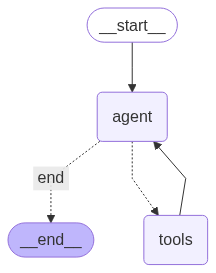

In [19]:
from IPython.display import Image, display
from io import BytesIO

image_data =graph.get_graph().draw_mermaid_png()
display(Image(image_data))

### Sophisticated Routing and Flow Control

The conditional routing function embodies the decision-making logic that determines the flow of execution through the agent graph. This seemingly simple function encapsulates sophisticated state analysis that determines whether the agent has completed its reasoning or requires additional tool executions.

The use of Literal types for return values provides compile-time validation of routing decisions, ensuring that the function can only return values that correspond to valid graph edges. This type safety prevents runtime errors that could occur if routing functions returned invalid destinations, while also enabling static analysis tools to verify graph connectivity during development.

The routing logic demonstrates how complex agent behaviors can emerge from simple decision rules. By examining whether the latest message contains tool calls, the function effectively implements a state machine that alternates between reasoning and action phases, enabling the agent to engage in sophisticated problem-solving patterns without explicit state management complexity.

## Comprehensive Test Coverage Strategy

The test suite design demonstrates thoughtful coverage of different agent capabilities and **reasoning patterns**. Each *test query is specifically chosen to exercise different aspects of the agent's functionality*, from simple tool invocation to complex mathematical reasoning.

### Local Development Testing Strategy

The testing framework demonstrates a sophisticated approach to validating agent behavior that goes beyond simple input-output verification. The test function provides detailed visibility into the agent's decision-making process, showing not just the final response but the *complete sequence of reasoning steps*, tool calls, and result integration.

The visual formatting of test output serves multiple purposes beyond simple readability. The *numbered message sequence* enables developers to 
- trace the exact flow of information through the agent system, 
- identifying potential inefficiencies or unexpected behaviors. 

The special handling of tool calls provides immediate visibility into which capabilities the agent chose to invoke, enabling rapid validation of decision-making logic.

The content truncation feature balances comprehensive logging with practical readability, ensuring that long responses don't obscure the overall flow while still providing enough context to understand the agent's behavior. This approach becomes particularly valuable when testing complex multi-tool scenarios where understanding the sequence of operations is crucial for validation.

In [5]:
def test_agent_interaction(query: str):
    """Test a single interaction with the agent."""
    print(f"\n{'='*60}")
    print(f"🤖 Testing query: {query}")
    print(f"{'='*60}")
    
    result = graph.invoke({
        "messages": [HumanMessage(content=query)]
    })
    
    print("\n📋 Conversation History:")
    for i, message in enumerate(result["messages"]):
        message_type = type(message).__name__
        if hasattr(message, 'tool_calls') and message.tool_calls:
            print(f"{i+1}. {message_type}: [Called tools: {[tc['name'] for tc in message.tool_calls]}]")
        else:
            content = message.content[:100] + "..." if len(message.content) > 100 else message.content
            print(f"{i+1}. {message_type}: {content}")
    
    return result

# Test different types of queries
test_queries = [
    "What's the weather like in London?",
    "Calculate 25 * 14 + 100",
    "Search for information about LangGraph",
    "What's 15% of 240?"
]

print("🧪 Running test queries...")
for query in test_queries:
    test_agent_interaction(query)

🧪 Running test queries...

🤖 Testing query: What's the weather like in London?

📋 Conversation History:
1. HumanMessage: What's the weather like in London?
2. AIMessage: [Called tools: ['get_weather']]
3. ToolMessage: The weather in London is Cloudy with light rain, 15°C
4. AIMessage: The weather in London is currently cloudy with light rain, and the temperature is around 15°C.

🤖 Testing query: Calculate 25 * 14 + 100

📋 Conversation History:
1. HumanMessage: Calculate 25 * 14 + 100
2. AIMessage: [Called tools: ['calculate_math']]
3. ToolMessage: The result of 25 * 14 + 100 is 450
4. AIMessage: The result of the calculation \( 25 \times 14 + 100 \) is 450.

🤖 Testing query: Search for information about LangGraph

📋 Conversation History:
1. HumanMessage: Search for information about LangGraph
2. AIMessage: [Called tools: ['search_web']]
3. ToolMessage: Search results for 'LangGraph': Here are some relevant articles and information about LangGraph. Thi...
4. AIMessage: I found some info

The weather query tests the agent's ability to recognize location-based information requests and map them to appropriate tool calls. This seemingly simple test validates several complex processes including 

- natural language understanding, 
- tool selection logic, 
- parameter extraction, 
- and result synthesis 
- The query also tests the agent's handling of proper nouns and geographic entity recognition.

The mathematical calculation tests demonstrate the agent's ability to 
- distinguish between different types of computational requests. 
- The basic arithmetic test validates straightforward calculation scenarios, while the percentage calculation test requires the agent to understand mathematical concepts and translate them into appropriate computational expressions. 

These tests ensure that the agent can handle both explicit mathematical expressions and word problems that require interpretation.

## Production Deployment Considerations

### Scalability and Performance Optimization

Transitioning from development to production requires careful consideration of performance characteristics and scalability requirements. The *<span>current synchronous implementation, while excellent for development and testing</span>{:rtxt}, would benefit from asynchronous patterns in production environments where concurrent user requests are common{:gtxt}*. Converting tool functions to async implementations would enable the agent to handle multiple requests simultaneously without blocking on external API calls or computational tasks.

Caching strategies become crucial for production deployments, particularly for frequently requested information such as weather data or common mathematical calculations. Implementing intelligent caching with appropriate **TTL** (time-to-live) values can dramatically reduce response times while minimizing external API calls. The caching layer should be designed to invalidate appropriately based on the nature of the cached data, ensuring that users receive fresh information when necessary while benefiting from cached responses when appropriate.

Rate **limiting and request throttling mechanisms** are essential for protecting both the agent system and external services from overload (example AWS API Gateway[^2]). Implementing exponential backoff patterns for failed API calls, circuit breaker patterns for unreliable services, and request queuing for high-volume scenarios ensures that the agent remains responsive even under adverse conditions.

### Security Hardening and Risk Mitigation

Production AI agents require comprehensive security measures that go beyond the basic input validation demonstrated in the development implementation. **Input sanitization** must be applied consistently across all user inputs, with particular attention to preventing *injection attacks*{:rtxt} that could compromise tool execution or expose sensitive information.

API key management in production environments should leverage dedicated secret management services (using tool such as AWS Secret Manager[^3]) rather than environment variables, enabling secure key rotation, access auditing, and fine-grained permission control. The agent system should implement proper authentication and authorization mechanisms to ensure that only authorized users can access specific tools or capabilities.

Audit logging becomes crucial for production AI systems, providing visibility into tool usage patterns, potential security incidents, and system performance characteristics. Comprehensive logging should capture tool invocations, parameter values (with appropriate sanitization of sensitive data), execution times, and result summaries, enabling both security monitoring and performance optimization.

## Monitoring, Observability, and Maintenance

Production AI agents require sophisticated monitoring capabilities that provide visibility into both technical performance metrics and behavioral characteristics. Integration with observability platforms(such as AWS CloudWatch[^4] and AWS CloudTrail[^5]) should capture response times, error rates, tool usage patterns, and conversation quality metrics, enabling proactive identification of issues before they impact users.

LangSmith[^6] integration provides specialized monitoring capabilities designed specifically for language model applications, including

- detailed tracing of reasoning steps, 
- token usage analysis, and 
- conversation quality metrics

> This specialized tooling enables developers to understand not just whether the agent is working, but how effectively it's reasoning about problems and whether its tool selection decisions are optimal.
{:.green}

**Synthetic transaction monitoring** can verify that the complete end-to-end agent workflow functions correctly, catching integration issues that might not be apparent from simple service health checks.

The maintenance strategy should include regular evaluation of agent performance against evolving user needs, periodic review of tool effectiveness, and systematic updates to system prompts based on observed interaction patterns. This ongoing optimization ensures that the agent continues to provide value as user expectations and use cases evolve over time.

[^1]: [Steup LangGraph Studio for AI Agent]({% post_url 2025-09-05-LangGraph_studio_v2 %}){:target="_blank"}
[^2]: [What is Amazon API Gateway? - Amazon API Gateway](https://docs.aws.amazon.com/apigateway/latest/developerguide/welcome.html){:target="_blank"}
[^3]: [What is AWS Secrets Manager? - AWS Secrets Manager](https://docs.aws.amazon.com/secretsmanager/latest/userguide/intro.html){:target="_blank"}
[^4]: [What is Amazon CloudWatch? - Amazon CloudWatch](https://docs.aws.amazon.com/AmazonCloudWatch/latest/monitoring/WhatIsCloudWatch.html){:target="_blank"}
[^5]: [What Is AWS CloudTrail? - AWS CloudTrail](https://docs.aws.amazon.com/awscloudtrail/latest/userguide/cloudtrail-user-guide.html){:target="_blank"}
[^6]: [Get started with LangSmith - Docs by LangChain](https://docs.langchain.com/langsmith/home){:target="_blank"}

{:gtxt: .message color="green"}
{:rtxt: .message color="red"}